In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import missingno as msno


In [2]:
df=pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
df.rename(columns={X: X.replace(' ', '_') for X in df.columns},inplace=True)

In [3]:
df.rename(columns={X: X.replace(' ', '_') for X in df.columns})

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


In [4]:
df.info

<bound method DataFrame.info of        Activity_Period Operating_Airline Operating_Airline_IATA_Code  \
0               200507      ATA Airlines                          TZ   
1               200507      ATA Airlines                          TZ   
2               200507      ATA Airlines                          TZ   
3               200507       Air Canada                           AC   
4               200507       Air Canada                           AC   
...                ...               ...                         ...   
15002           201603    Virgin America                          VX   
15003           201603    Virgin America                          VX   
15004           201603    Virgin America                          VX   
15005           201603   Virgin Atlantic                          VS   
15006           201603   Virgin Atlantic                          VS   

      Published_Airline Published_Airline_IATA_Code    GEO_Summary GEO_Region  \
0          ATA Airline

In [5]:
df.head()

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [6]:
df['Passenger_Count'].describe()

count     15007.000000
mean      29240.521090
std       58319.509284
min           1.000000
25%        5373.500000
50%        9210.000000
75%       21158.500000
max      659837.000000
Name: Passenger_Count, dtype: float64

In [7]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

<AxesSubplot:>

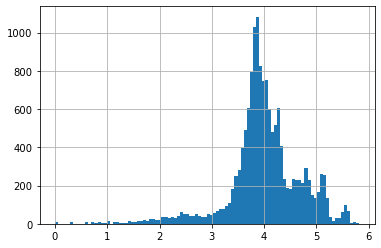

In [8]:
np.log10(df['Passenger_Count']).hist(bins=100)

<AxesSubplot:>

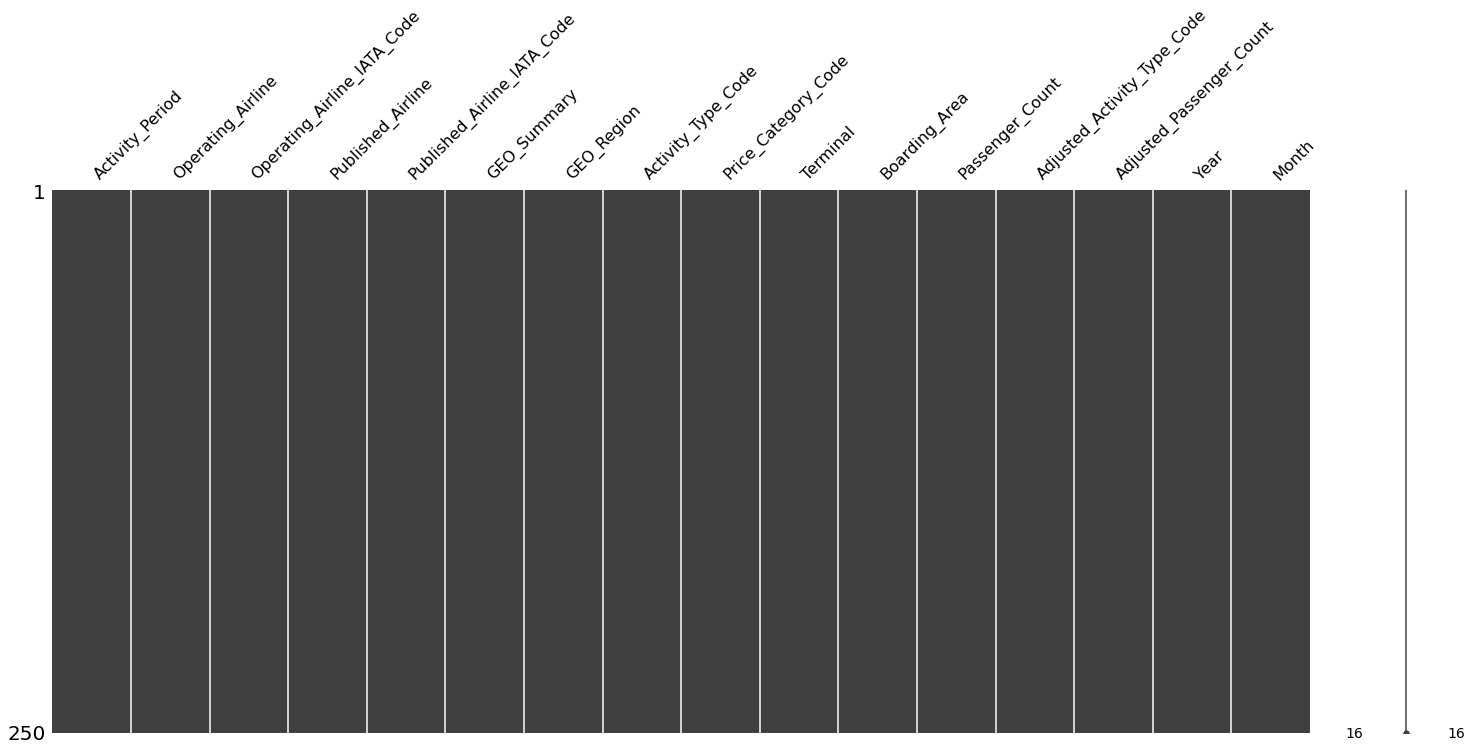

In [9]:
msno.matrix(df.sample(250))

In [10]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

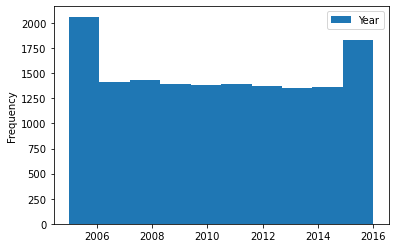

In [11]:
df.plot(x='Passenger_Count', y='Year',kind='hist')


In [12]:
df.head

<bound method NDFrame.head of        Activity_Period Operating_Airline Operating_Airline_IATA_Code  \
0               200507      ATA Airlines                          TZ   
1               200507      ATA Airlines                          TZ   
2               200507      ATA Airlines                          TZ   
3               200507       Air Canada                           AC   
4               200507       Air Canada                           AC   
...                ...               ...                         ...   
15002           201603    Virgin America                          VX   
15003           201603    Virgin America                          VX   
15004           201603    Virgin America                          VX   
15005           201603   Virgin Atlantic                          VS   
15006           201603   Virgin Atlantic                          VS   

      Published_Airline Published_Airline_IATA_Code    GEO_Summary GEO_Region  \
0          ATA Airlines 

In [13]:
lista_kolumn=['Activity_Period','Passenger_Count','Adjusted_Passenger_Count','Year']
for i in df.columns:
    if i in lista_kolumn:
        continue
    # and i!= df['Passenger Count'] and i!= df[ 'Adjusted Passenger Count'] and i!= df['Year']
    df[i]=df[i].factorize()[0]
        # print(i)

In [14]:
df.columns

Index(['Activity_Period', 'Operating_Airline', 'Operating_Airline_IATA_Code',
       'Published_Airline', 'Published_Airline_IATA_Code', 'GEO_Summary',
       'GEO_Region', 'Activity_Type_Code', 'Price_Category_Code', 'Terminal',
       'Boarding_Area', 'Passenger_Count', 'Adjusted_Activity_Type_Code',
       'Adjusted_Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [15]:
df['Month'].describe()

count    15007.000000
mean         5.401879
std          3.451741
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: Month, dtype: float64

In [16]:
corr = df.corr()
corr['Passenger_Count'].sort_values(ascending=False)[1:16].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,Passenger_Count
Adjusted_Passenger_Count,0.999941
Boarding_Area,0.345417
Terminal,0.260570
Operating_Airline_IATA_Code,0.093198
Published_Airline_IATA_Code,0.089718
Published_Airline,0.087571
Operating_Airline,0.084493
Activity_Period,0.060311
Year,0.060069
Month,-0.012817


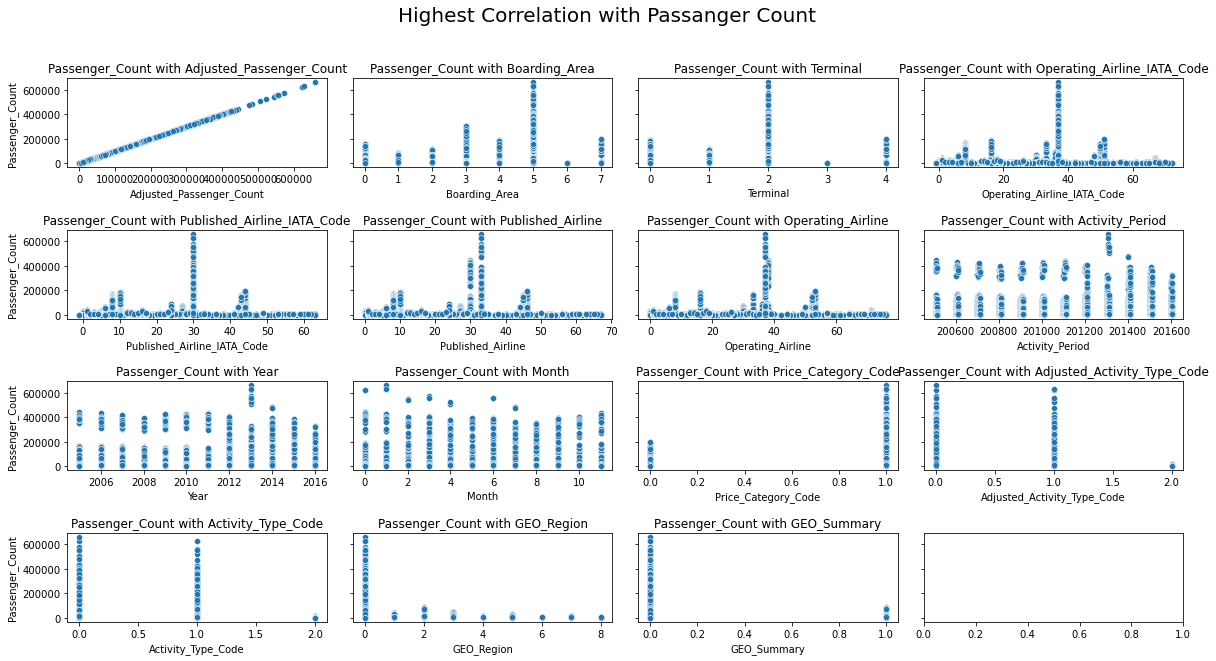

In [17]:
#Visualize columns have corr with Passenger_Count

high_corr = corr['Passenger_Count'].sort_values(ascending=False)[1:][:16].index.tolist()

fig, axes = plt.subplots(4,4, figsize=(20, 10), sharey=True);
plt.subplots_adjust(hspace = 0.7, wspace=0.1)
fig.suptitle('Highest Correlation with Passanger Count', fontsize=20);

for i,col in zip(range(16),high_corr):
    sns.scatterplot(y=df['Passenger_Count'], x=df[col], ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title('Passenger_Count with '+col)

In [18]:
#Normalizacja
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
minmax_df = minmax.fit_transform(df)
df_scaled = pd.DataFrame(minmax_df, columns=df.columns)
df_scaled

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count,Adjusted_Activity_Type_Code,Adjusted_Passenger_Count,Year,Month
0,0.0,0.000000,0.013699,0.000000,0.015625,0.0,0.000,0.0,0.0,0.00,0.000000,0.041328,0.0,0.041328,0.0,0.000000
1,0.0,0.000000,0.013699,0.000000,0.015625,0.0,0.000,0.5,0.0,0.00,0.000000,0.044147,0.5,0.044147,0.0,0.000000
2,0.0,0.000000,0.013699,0.000000,0.015625,0.0,0.000,1.0,0.0,0.00,0.000000,0.008205,1.0,0.016412,0.0,0.000000
3,0.0,0.013158,0.027397,0.014925,0.031250,1.0,0.125,0.0,1.0,0.00,0.000000,0.053278,0.0,0.053278,0.0,0.000000
4,0.0,0.013158,0.027397,0.014925,0.031250,1.0,0.125,0.5,1.0,0.00,0.000000,0.051663,0.5,0.051663,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,1.0,0.697368,0.712329,0.686567,0.703125,0.0,0.000,0.5,0.0,1.00,1.000000,0.294975,0.5,0.294975,1.0,0.818182
15003,1.0,0.697368,0.712329,0.686567,0.703125,1.0,0.625,0.0,0.0,0.25,0.285714,0.006347,0.0,0.006347,1.0,0.818182
15004,1.0,0.697368,0.712329,0.686567,0.703125,1.0,0.625,0.5,0.0,1.00,1.000000,0.007111,0.5,0.007111,1.0,0.818182
15005,1.0,0.513158,0.534247,0.507463,0.531250,1.0,0.375,0.0,1.0,0.25,0.285714,0.018659,0.0,0.018659,1.0,0.818182


In [20]:
#Podział danych do modelowania, dane treningowe
X = df_scaled.drop('Passenger_Count', axis=1) # data
X=X.drop('Adjusted_Passenger_Count',axis=1) #data
y = df_scaled.Passenger_Count # labels

In [21]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
print(utils.multiclass.type_of_target(y))


print(utils.multiclass.type_of_target(y.astype('int')))


print(utils.multiclass.type_of_target(encoded))


continuous
binary
multiclass


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,encoded,test_size=0.25,random_state=0)

In [24]:
#Modelowanie

#Funkcja która zwraca parametry poszczególnych modeli
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [25]:
y_train.dtype

dtype('int64')

In [26]:
#Improtowanie bibliotek do modelowania
# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [27]:
#KNeighborsClassifier

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    8)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 14.77
Accuracy CV 10-Fold: 0.22


In [29]:
# Gaussian Naive Bayes

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           2)

print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 72.02
Accuracy CV 10-Fold: 0.12


In [30]:
# Linear SVC

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                2)

print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 6.33
Accuracy CV 10-Fold: 0.19


In [31]:
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  2)

print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 0.3
Accuracy CV 10-Fold: 0.05


In [40]:
# Decision Tree Classifier

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                5)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

C:\Users\Aldona\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 100.0
Accuracy CV 10-Fold: 0.44


In [42]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'
              ],
    'Score': [
         
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
       
        
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,100.00
1,Naive Bayes,72.02
0,Logistic Regression,14.77
3,Linear SVC,6.33
2,Stochastic Gradient Decent,0.30
